# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key

'3897b6b8484088d7badabba42cfa2cd0'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [4]:
cities

['codrington',
 'husavik',
 'vangaindrano',
 'arraial do cabo',
 'saint-georges',
 'carnarvon',
 'kapit',
 'urumqi',
 'hilo',
 'bredasdorp',
 'benalla',
 'nanortalik',
 'tiznit',
 'saint-philippe',
 'punta arenas',
 'tasiilaq',
 'abu kamal',
 'mashhad',
 'khuzdar',
 'busselton',
 'hobart',
 'atuona',
 'saldanha',
 'benghazi',
 'georgetown',
 'bathsheba',
 'khorol',
 'sakaiminato',
 'bluff',
 'tiarei',
 'salalah',
 'palabuhanratu',
 'yarada',
 'marataizes',
 'severo-kurilsk',
 'nikolskoye',
 'vitim',
 'illoqqortoormiut',
 'new norfolk',
 'sitka',
 'san cristobal',
 'waitati',
 'kavieng',
 'bay roberts',
 'kapaa',
 'chokurdakh',
 'kargil',
 'sentyabrskiy',
 'kavaratti',
 'koumac',
 'kaitangata',
 'esperance',
 'ferme-neuve',
 'huarmey',
 'albany',
 'gurupi',
 'aksarka',
 'touros',
 'hami',
 'bolotnoye',
 'limon',
 'klyuchi',
 'kuche',
 'norman wells',
 'chaumont',
 'whitianga',
 'petatlan',
 'bobonong',
 'anniston',
 'vaini',
 'attawapiskat',
 'mataura',
 'general roca',
 'gat',
 'sao fi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
cities

['punta arenas',
 'ushuaia',
 'vaini',
 'illoqqortoormiut',
 'provideniya',
 'saskylakh',
 'luderitz',
 'hithadhoo',
 'constitucion',
 'ossora',
 'cavalcante',
 'baykit',
 'belushya guba',
 'shanghai',
 'quthing',
 'taolanaro',
 'lagoa',
 'mataura',
 'ponta do sol',
 'thompson',
 'carnarvon',
 'hobart',
 'kodiak',
 'yellowknife',
 'lima',
 'richards bay',
 'kapaa',
 'barrow',
 'turbat',
 'te anau',
 'hajdudorog',
 'albany',
 'busselton',
 'kawalu',
 'popondetta',
 'tsihombe',
 'grand river south east',
 'gualaquiza',
 'bredasdorp',
 'vega de alatorre',
 'belebey',
 'sibolga',
 'pangai',
 'asau',
 'cidreira',
 'nueva guinea',
 'martapura',
 'severo-yeniseyskiy',
 'maumere',
 'iaciara',
 'jamestown',
 'carutapera',
 'bundu',
 'svetlyy',
 'shingu',
 'abha',
 'sentyabrskiy',
 'samusu',
 'okha',
 'barentsburg',
 'zhangjiakou',
 'mar del plata',
 'atuona',
 'new norfolk',
 'bolshaya rechka',
 'gazli',
 'dikson',
 'hermanus',
 'bathsheba',
 'nades',
 'arraial do cabo',
 'vostok',
 'faanui',
 

In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_weather_list = []

print("Beginning Data Retrieval")    
print("-----------------------------")
record = 1
setcount = 1
for i, city in enumerate(cities):
    url_per_city = url + "&q=" + city

    if (i % 50 == 0 and i>=50):
        setcount = setcount + 1
        record = 0
    print(f"Processing Record {record} of Set {setcount} | {city}")
    record = record + 1
    try:
        data = requests.get(url_per_city).json()
        city_name = city
        cloudiness = data['clouds']['all']
        country = data['sys']['country']
        humidity = data['main']['humidity']
        date = data['dt']
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        max_temp = data['main']['temp_max']
        wind_speed = data['wind']['speed']
    
        city_weather_list.append({ "City": city_name,
                                  "Cloudiness": cloudiness,
                                  "Country": country,
                                  "Date" : date,
                                  "Humidity": humidity,
                                  "Lat": lat,
                                  "Lon": lon,
                                   "Max Temp" : max_temp,
                                  "Wind Speed" : wind_speed })
    except:
        print("City not found... Skipping")
        pass

print("-----------------------------")
print("Data Retrieval Complete ")    
print("-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | husavik
Processing Record 3 of Set 1 | vangaindrano
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | saint-georges
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | kapit
Processing Record 8 of Set 1 | urumqi
City not found... Skipping
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | benalla
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | tiznit
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | abu kamal
Processing Record 18 of Set 1 | mashhad
Processing Record 19 of Set 1 | khuzdar
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | atuona
Processin

Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | hermiston
Processing Record 39 of Set 4 | kjopsvik
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | wum
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | zhuhai
Processing Record 45 of Set 4 | iralaya
Processing Record 46 of Set 4 | chardara
City not found... Skipping
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | dukat
Processing Record 49 of Set 4 | tabiauea
City not found... Skipping
Processing Record 0 of Set 5 | fortuna
Processing Record 1 of Set 5 | portland
Processing Record 2 of Set 5 | kudahuvadhoo
Processing Record 3 of Set 5 | grigiskes
Processing Record 4 of Set 5 | starokozache
Processing Record 5 of Set 5 | ponta delgada
Processing Record 6 of Set 5 | fort saint john
City not found... Skipping
Processing Record 7 of Set 5 | barentsburg
City not found... Skipping
Processing Record

Processing Record 25 of Set 8 | mehriz
Processing Record 26 of Set 8 | minab
Processing Record 27 of Set 8 | cuiluan
Processing Record 28 of Set 8 | tabuk
Processing Record 29 of Set 8 | qaqortoq
Processing Record 30 of Set 8 | skalistyy
City not found... Skipping
Processing Record 31 of Set 8 | alice springs
Processing Record 32 of Set 8 | kongwa
Processing Record 33 of Set 8 | isla vista
Processing Record 34 of Set 8 | outram
Processing Record 35 of Set 8 | bargal
City not found... Skipping
Processing Record 36 of Set 8 | cullinan
Processing Record 37 of Set 8 | vanavara
Processing Record 38 of Set 8 | otradinskiy
City not found... Skipping
Processing Record 39 of Set 8 | halalo
City not found... Skipping
Processing Record 40 of Set 8 | fairbanks
Processing Record 41 of Set 8 | tshane
Processing Record 42 of Set 8 | college
Processing Record 43 of Set 8 | cayenne
Processing Record 44 of Set 8 | santa eulalia del rio
City not found... Skipping
Processing Record 45 of Set 8 | deer lake

Processing Record 10 of Set 12 | altamira
Processing Record 11 of Set 12 | sungaipenuh
Processing Record 12 of Set 12 | tuggurt
City not found... Skipping
Processing Record 13 of Set 12 | kitimat
Processing Record 14 of Set 12 | yinchuan
Processing Record 15 of Set 12 | kwidzyn
Processing Record 16 of Set 12 | toamasina
Processing Record 17 of Set 12 | ballina
Processing Record 18 of Set 12 | san quintin
Processing Record 19 of Set 12 | camana
City not found... Skipping
Processing Record 20 of Set 12 | trincomalee
Processing Record 21 of Set 12 | rio brilhante
Processing Record 22 of Set 12 | margate
Processing Record 23 of Set 12 | tikhvin
Processing Record 24 of Set 12 | bosaso
Processing Record 25 of Set 12 | linxia
Processing Record 26 of Set 12 | klaksvik
Processing Record 27 of Set 12 | saint-andre-les-vergers
Processing Record 28 of Set 12 | bataipora
Processing Record 29 of Set 12 | santa luzia
Processing Record 30 of Set 12 | cabo san lucas
Processing Record 31 of Set 12 | min

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df = pd.DataFrame(city_weather_list)
df.head(7)
df.to_csv("city_weather_data.csv")

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

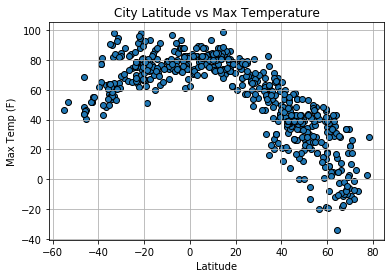

In [9]:
lat = df["Lat"]
temp = df["Max Temp"]
plt.scatter(lat, temp, edgecolor = "black")
plt.grid(True)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

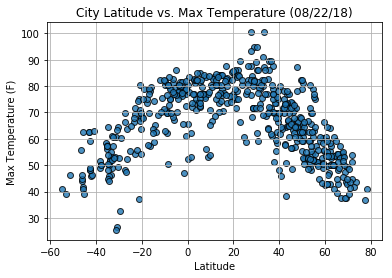

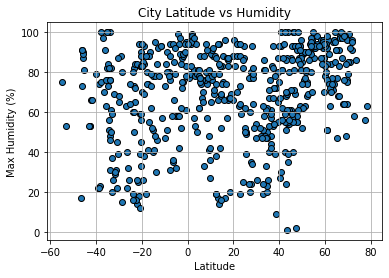

In [10]:
lat = df["Lat"]
humidity = df["Humidity"]

plt.scatter(lat, humidity, edgecolor = "black")
plt.grid(True)

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (%)")

plt.show()

#### Latitude vs. Humidity Plot

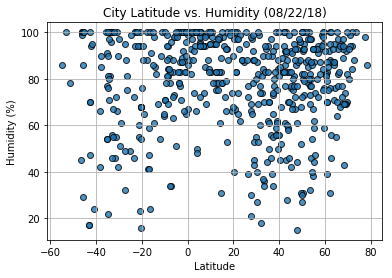

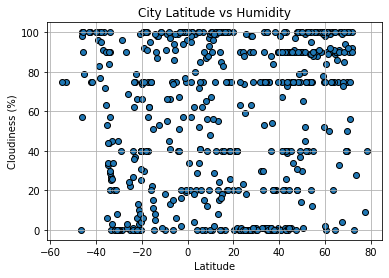

In [11]:
lat = df["Lat"]
cloud = df["Cloudiness"]

plt.scatter(lat, cloud, edgecolor = "black")
plt.grid(True)

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

#### Latitude vs. Cloudiness Plot

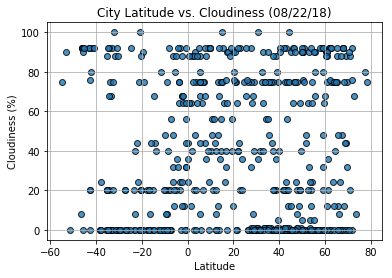

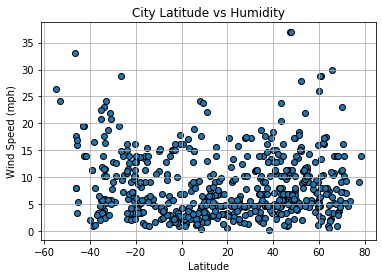

In [12]:
lat = df["Lat"]
windsp = df["Wind Speed"]

plt.scatter(lat, windsp, edgecolor = "black")
plt.grid(True)

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

#### Latitude vs. Wind Speed Plot

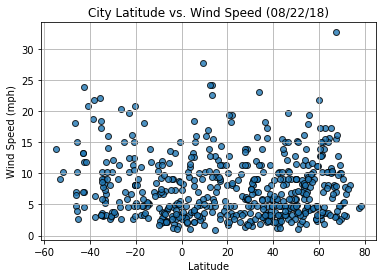